In [1]:
import sys

In [2]:
import os 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from colorsetup import colors, palette
sns.set_palette(palette)

In [3]:
data = pd.read_csv(r'Human_Activity_Recognition_Using_Smartphones_Data.csv')

In [4]:
data_orig = data.copy()

In [5]:
data.shape

(10299, 562)

In [6]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [7]:
data.describe() # We dont need to scale as the range is between -1 to 1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print(data.iloc[:, :-1].min().value_counts())

-1.0    561
dtype: int64


In [9]:
print(data.iloc[:, :-1].max().value_counts())

1.0    561
dtype: int64


In [10]:
data.Activity.value_counts()  # The data is fairly balanced.

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

* Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
def ordinal_encoding(frame, column):
    le = LabelEncoder()
    return le.fit_transform(frame[column]), le.classes_

In [13]:
column_name = 'Activity'
data[column_name], mapped_to = ordinal_encoding(data, column_name)

In [14]:
class_dict = dict(zip(data_orig[column_name].unique(), data['Activity'].unique()))

In [15]:
data_orig.loc[598].Activity , data.loc[598].Activity

('LAYING', 0.0)

In [16]:
data.Activity.sample(5)

9304    3
8980    3
9495    3
5170    3
4915    1
Name: Activity, dtype: int32

### Correlations
  * Between dependent variables

In [17]:
np.array(data).shape

(10299, 562)

In [18]:
def get_corr(frame, independent):
    dependent = frame.drop(independent, axis=1)
    return dependent.corr()

In [19]:
corr = get_corr(data, column_name)

In [20]:
def get_correlation_for_feature(correlation_frame):
    lower_triang = np.tril_indices_from(corr)  # retrieving indices of lower triangular matrix as it's a symmetric matrix
#     for coordinates in list(zip(*lower_triang)):  # The * operator unpacks all the values of array 
    cir = np.array(correlation_frame) 
    cir[lower_triang] = np.nan
#     feature_df = pd.DataFrame(cir)
    # to get a dataframe with feature names
    feature_df = pd.DataFrame(cir, columns=data.drop('Activity', axis=1).columns, index=data.drop('Activity', axis=1).columns)
    
    
    corr_frame = (feature_df    # dataframe with lower triangle Nan-ed out
              .stack()
              .to_frame()
              .reset_index()   # turns the existing index into column and creates new numeric index
              .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))
    corr_frame['Absolutecorrelation'] = corr_frame.correlation.abs()
    return corr_frame

``` Python 
corr.isna().sum()  # The entire upper triangular matrix is made equal to Nan
```

``` Python
corr.stack().loc['tBodyAcc-mean()-X'].shape   # stack creates each column as subindex for every index
```

In [21]:
corr_features = get_correlation_for_feature(corr)
corr_features.shape

(157080, 4)

<Figure size 864x576 with 0 Axes>

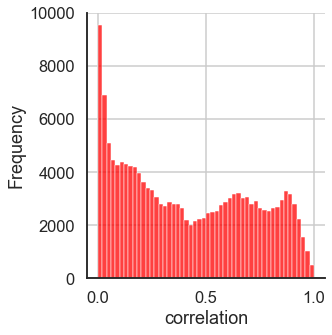

In [22]:
plt.figure(figsize=(12, 8))
sns.set_style('white')
sns.set_context('talk')
sns.displot(corr_features.Absolutecorrelation, color='red', bins=50)
plt.xlabel('correlation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Looking at the correlation histogram there are higly correlated features

In [23]:
corr_features[corr_features['Absolutecorrelation'] > 0.8]

,feature1,feature2,correlation,Absolutecorrelation
1677,tBodyAcc-std()-X,tBodyAcc-std()-Y,0.922525,0.922525
1678,tBodyAcc-std()-X,tBodyAcc-std()-Z,0.861910,0.861910
1679,tBodyAcc-std()-X,tBodyAcc-mad()-X,0.998662,0.998662
1680,tBodyAcc-std()-X,tBodyAcc-mad()-Y,0.916087,0.916087
1681,tBodyAcc-std()-X,tBodyAcc-mad()-Z,0.856497,0.856497
...,...,...,...,...
156976,fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-iqr(),0.981439,0.981439
156977,fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-entropy(),0.897582,0.897582
156989,fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),0.866652,0.866652
157002,fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),0.888263,0.888263


### Data preprocessing

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
def get_splits(dataframe, target):
    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    split_obj = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3)
    train_indices, test_indices = next(split_obj.split(X, y))
    x_train, y_train, x_test, y_test = X.loc[train_indices], y.loc[train_indices], X.loc[test_indices], y.loc[test_indices] 
    return  x_train, y_train, x_test, y_test

In [26]:
X_train, y_train, X_test, y_test = get_splits(data, 'Activity')

In [27]:
# Normalize divides all the count values by sum of counts
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)  # almost similar. So there is no imbalance

(0    0.188792
 2    0.185046
 1    0.172562
 3    0.167152
 5    0.149951
 4    0.136496
 Name: Activity, dtype: float64,
 0    0.188673
 2    0.185113
 1    0.172492
 3    0.167314
 5    0.149838
 4    0.136570
 Name: Activity, dtype: float64)

## Fitting a Logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
Logreg = LogisticRegression(solver='liblinear')
Logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
from sklearn.linear_model import LogisticRegressionCV

In [31]:
log_l1 = LogisticRegressionCV(cv=4, penalty='l1', Cs=10, solver='liblinear')  # we are doing One vs rest Not Multinomial or softmax
log_l1.fit(X_train, y_train)

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')

In [32]:
log_l2 = LogisticRegressionCV(cv=4, penalty='l2', Cs=10, solver='liblinear')  # 10 different C values
log_l2.fit(X_train, y_train)

LogisticRegressionCV(cv=4, solver='liblinear')

In [33]:
log_l1.coef_.shape

(6, 561)

In [34]:
coeffs_list = []

labels = ['logreg', 'l1', 'l2']
estimators = [Logreg, log_l1, log_l2]
for label, est in zip(labels, estimators):
    coeffs = est.coef_
    column_names = pd.MultiIndex(levels=[[label], sorted(class_dict)], codes=[[0, 0, 0, 0, 0, 0],[0,1, 2, 3, 4, 5]])
    coeffs_list.append(pd.DataFrame(coeffs.T, columns=column_names))
coeff_frame = pd.concat(coeffs_list, axis=1)

In [35]:
coeff_frame

logreg                                                   \
       LAYING   SITTING  STANDING   WALKING WALKING_DOWNSTAIRS   
0   -0.087506 -0.445226  0.257963 -0.169284           0.765611   
1    0.014493 -0.201046  0.060892 -0.023509           0.107967   
2    0.030187  0.063196  0.245909  0.022339           0.058980   
3    0.004590 -0.733963 -0.352732 -0.701328           0.266984   
4   -0.045407 -0.034154 -0.451850  0.260244          -0.516844   
..        ...       ...       ...       ...                ...   
556 -0.022132 -0.659468  0.550630 -0.234927           0.385178   
557  0.058454 -0.246969  0.268995 -0.162010          -0.157603   
558  1.599105 -2.473094 -0.854612 -0.313142          -0.712694   
559 -0.374313 -0.740397  1.771455 -0.242904          -0.275139   
560 -0.188309 -0.298022  0.416920  0.065047          -0.042363   

                            l1                                \
    WALKING_UPSTAIRS    LAYING   SITTING  STANDING   WALKING   
0          -0.080084 -0.069235  0.000000  0.000000  0.000000   
1          -0.247193  0.000000  0.000000  0.000000  0.000000   
2          -0.402526  0.000000  0.000000  0.000000  0.000000   
3           0.696120  0.000000 -1.635590 -0.580560 -1.010945   
4           0.106248  0.000000  0.000000 -1.485767  0.000000   
..               ...       ...       ...       ...       ...   
556        -0.351492  0.000000 -0.764471  0.488689 -0.153307   
557         0.174153  0.000000 -0.665117  0.870864 -0.083177   
558         0.416311  3.575271 -7.977984  0.000000  0.000000   
559         0.876728 -0.683136  0.000000  0.000000  0.000000   
560         0.438815 -0.649655  0.000000  0.000000  0.000000   

                                               l2                      \
    WALKING_DOWNSTAIRS WALKING_UPSTAIRS    LAYING   SITTING  STANDING   
0             3.936121         0.000000 -0.135283 -1.347882  0.484658   
1             0.000000         0.000000  0.029334 -1.136833  0.106808   
2             0.000000         0.000000  0.040581 -1.421389  0.464225   
3             0.000000         2.363191  0.019091 -2.562807 -0.435129   
4            -1.451499         0.000000 -0.035987  0.604907 -0.665766   
..                 ...              ...       ...       ...       ...   
556           0.469368        -0.733520 -0.142627 -0.820564  0.584620   
557          -0.048760         0.366458  0.119148 -0.677064  0.456842   
558          -0.929192         0.245539  2.949029 -9.613009 -0.922835   
559           0.000000         2.359280 -0.543058  2.936913  2.219872   
560           0.000000         2.762571 -0.230753  0.888350  0.568867   

                                                   
      WALKING WALKING_DOWNSTAIRS WALKING_UPSTAIRS  
0   -0.478904           1.830108         0.270660  
1   -0.153962           0.186418        -0.884468  
2    0.134557           0.009798        -1.652023  
3   -1.788829           0.278696         3.195553  
4    0.902873          -0.974665         0.137099  
..        ...                ...              ...  
556 -0.632207           0.642775        -0.983198  
557 -0.486390          -0.148001         0.634879  
558 -0.832554          -1.463022         1.569913  
559 -0.940710          -0.660464         3.689748  
560  0.129749          -0.083912         1.905932  

[561 rows x 18 columns]

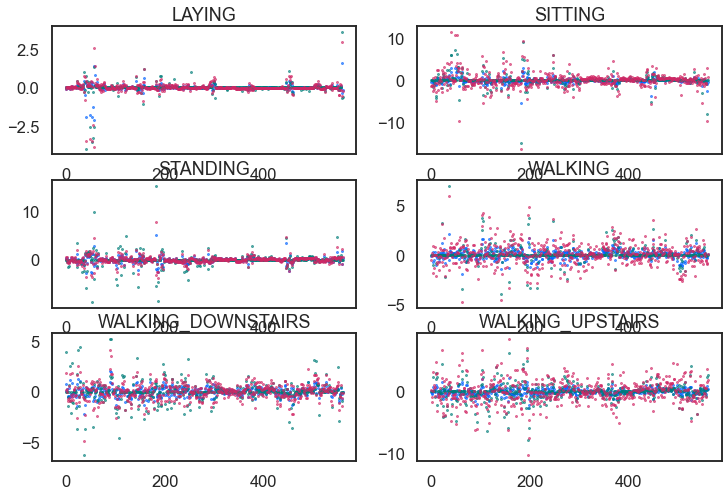

In [53]:
classes = list(class_dict.keys())
fig, ax = plt.subplots(3,2, figsize=(12, 8))
axlist = ax.flatten()
for label, i in zip(coeff_frame['logreg'].columns, axlist):
    coeff_frame.xs(label, axis=1, level=1).plot(marker='o', ms='2.0', alpha=.6, ax=i, legend=None,  ls='', title=label)
    


In [102]:
pd.DataFrame(log_l1.predict_proba(X_test))

,0,1,2,3,4,5
0,0.000036,6.491547e-06,1.036858e-03,9.989204e-01,4.335085e-10,3.948462e-08
1,0.000020,1.091334e-08,1.032196e-07,4.440179e-05,4.164304e-04,9.995190e-01
2,0.000004,3.530816e-03,2.117755e-07,9.952999e-01,1.161292e-03,3.997454e-06
3,0.000003,9.991833e-01,8.136756e-04,1.985146e-11,5.715299e-10,1.161703e-22
4,0.999920,8.000835e-05,2.502685e-14,3.599470e-10,1.583013e-10,4.594195e-20
...,...,...,...,...,...,...
3085,0.000003,4.875440e-01,5.119406e-01,5.120177e-04,1.458315e-10,5.259235e-09
3086,0.000042,1.347426e-05,6.932109e-07,9.868865e-01,9.418856e-08,1.305748e-02
3087,0.000001,9.836902e-01,1.630866e-02,5.722953e-11,4.044064e-10,3.114288e-11
3088,0.000004,9.990268e-01,2.161139e-05,5.612037e-10,3.073506e-12,9.474377e-04


In [110]:
predictons = []
probabilities = []
for label, est in zip(labels, estimators):
    predictons.append(pd.Series(est.predict(X_test), name=label))
    ind = pd.MultiIndex(levels=[[label], sorted(class_dict)], codes=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]])
    probabilities.append(pd.DataFrame(est.predict_proba(X_test), columns=ind))
predictons_frame = pd.DataFrame(predictons)
probabilities_frame = pd.concat(probabilities, axis=1)

### Metrics

In [82]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [39]:
predictons_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089
logreg,3,5,3,1,0,5,0,2,0,0,...,5,2,2,2,1,2,3,1,1,5
l1,3,5,3,1,0,5,0,2,0,0,...,5,2,2,2,1,2,3,1,1,5
l2,3,5,3,1,0,5,0,2,0,0,...,5,2,2,2,1,2,3,1,1,5


In [120]:
conf_matrix = dict()
metrics = list()
for label in labels:
    precision, recall, f1_score, support = score(y_test, predictons_frame.loc[label], average='weighted')
    accuracy = accuracy_score(y_test, predictons_frame.loc[label])
    auc_score = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5]), probabilities_frame[label], average='weighted')
    conf_matrix[label] = confusion_matrix(y_test, predictons_frame.loc[label])
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':f1_score, 'accuracy':accuracy,
                              'auc':auc_score}, 
                             name=label))
metrics = pd.concat(metrics, axis=1)
    

In [121]:
metrics

,logreg,l1,l2
precision,0.984144,0.983514,0.983824
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983819
accuracy,0.984142,0.983495,0.983819
auc,0.999338,0.999367,0.999252


In [75]:
conf_matrix['logreg']

array([[583,   0,   0,   0,   0,   0],
       [  0, 512,  21,   0,   0,   0],
       [  0,  22, 550,   0,   0,   0],
       [  0,   0,   0, 515,   1,   1],
       [  0,   0,   0,   1, 420,   1],
       [  0,   0,   0,   1,   1, 461]], dtype=int64)

In [76]:
def get_confmatrix_elements(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.values.sum() - (FP + FN + TP)
    return TP, FP, TN, FN

* A quick check

In [79]:
tp, fp, tn, fn = get_confmatrix_elements(pd.DataFrame(conf_matrix['l2']))
micro_avg_recall = tp.sum()/(tp + fn).sum()  
micro_avg_precision = tp.sum()/(tp + fp).sum()
f1 = 2* micro_avg_precision * micro_avg_recall/(micro_avg_precision + micro_avg_recall)
f1

0.9838187702265372

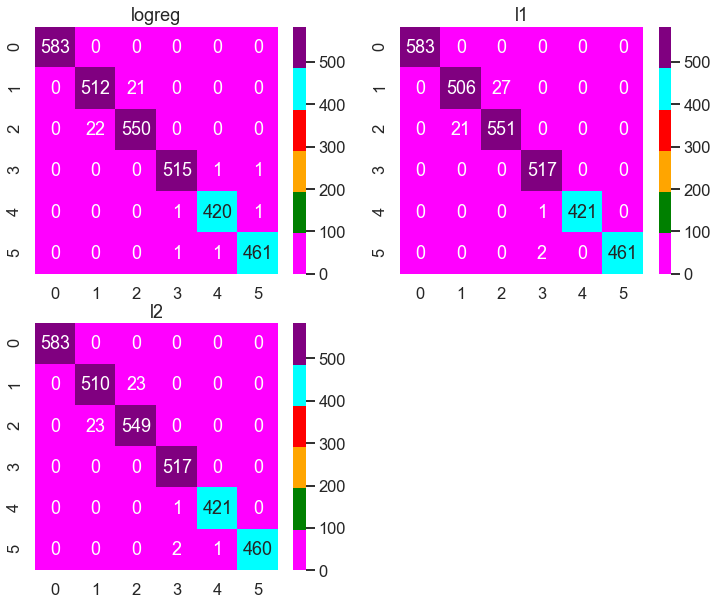

In [126]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 10)
axList = ax.flatten()
axList[-1].axis('off')
for ax, label in zip(axList[:-1], labels):
    sns.heatmap(conf_matrix[label], ax=ax, fmt='d', annot=True, cmap=['magenta', 'green', 'orange', 'red', 'cyan', 'purple'])
    ax.set(title=label)
plt.show()